In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/application_train.csv')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...               0.0              0.0              0.0              0.0   
1  ...               0.0              0.0              0.0              0.0   
2  ...               0.0              0.0              0.0              0.0   
3  ...               0.0              0.0              0.0              0.0   
4  ...               0.0              0.0              0.0              0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

# Data Understanding

In [ ]:
df.shape

(83439, 122)

In [ ]:
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [ ]:
df.nunique()

SK_ID_CURR                    83439
TARGET                            2
NAME_CONTRACT_TYPE                2
CODE_GENDER                       3
FLAG_OWN_CAR                      2
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY         7
AMT_REQ_CREDIT_BUREAU_WEEK        7
AMT_REQ_CREDIT_BUREAU_MON        20
AMT_REQ_CREDIT_BUREAU_QRT         9
AMT_REQ_CREDIT_BUREAU_YEAR       20
Length: 122, dtype: int64

In [ ]:
df.dtypes.value_counts()

float64    85
int64      21
object     16
dtype: int64

#Eksploration Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(85), int64(21), object(16)
memory usage: 77.7+ MB


In [ ]:
df.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count   83439.000000  83439.000000  83439.000000      8.343900e+04   
mean   148385.922135      0.080538      0.417311      1.695677e+05   
std     27901.262886      0.272126      0.723048      4.174066e+05   
min    100002.000000      0.000000      0.000000      2.565000e+04   
25%    124309.000000      0.000000      0.000000      1.125000e+05   
50%    148302.000000      0.000000      0.000000      1.462500e+05   
75%    172580.500000      0.000000      1.000000      2.025000e+05   
max    196778.000000      1.000000     12.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  8.343900e+04   83433.000000     8.337200e+04   
mean   5.985355e+05   27079.974524     5.377910e+05   
std    4.013457e+05   14463.734658     3.686657e+05   
min    4.500000e+04    1980.000000     4.500000e+04   
25%    2.700000e+05   16492.500000     2.385000e+05   
50%    5.124105e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34587.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count                83439.000000  83439.000000   83439.000000  ...   
mean                     0.020852 -16034.506981   63387.801735  ...   
std                      0.013802   4368.193073  140925.335089  ...   
min                      0.000533 -25201.000000  -17531.000000  ...   
25%                      0.010006 -19676.000000   -2768.000000  ...   
50%                      0.018850 -15760.000000   -1217.000000  ...   
75%                      0.028663 -12386.000000    -289.000000  ...   
max                      0.072508  -7676.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count      83438.000000      83438.000000      83438.000000      83438.000000   
mean           0.008365          0.000635          0.000419          0.000312   
std            0.091080          0.025195          0.020477          0.017650   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                72278.000000               72278.000000   
mean                     0.006793                   0.007347   
std                      0.086729                   0.106585   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      3.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                72278.000000               72278.000000   
mean                     0.033302                   0.269017   
std                      0.200337                   0.922013   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      6.000000                  24.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               72278.000000                72278.000000  
mean                    0.265572                    1.889399  
std                     0.612728                    1.875100  
min                     0.000000                    0.000000  
25%                     0.000000            

In [ ]:
cats = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE",
          "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START",
          "ORGANIZATION_TYPE", "EMERGENCYSTATE_MODE","FONDKAPREMONT_MODE","HOUSETYPE_MODE","WALLSMATERIAL_MODE"]

binary = ["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE","FLAG_PHONE", "FLAG_EMAIL","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY",
          "LIVE_CITY_NOT_WORK_CITY","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12",
          "FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]

nums = []
for col in df.columns:
    if col not in cats and col not in binary:
        nums.append(col)

df[nums].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 74 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    83439 non-null  int64  
 1   TARGET                        83439 non-null  int64  
 2   CNT_CHILDREN                  83439 non-null  int64  
 3   AMT_INCOME_TOTAL              83439 non-null  float64
 4   AMT_CREDIT                    83439 non-null  float64
 5   AMT_ANNUITY                   83433 non-null  float64
 6   AMT_GOODS_PRICE               83372 non-null  float64
 7   REGION_POPULATION_RELATIVE    83439 non-null  float64
 8   DAYS_BIRTH                    83439 non-null  int64  
 9   DAYS_EMPLOYED                 83439 non-null  int64  
 10  DAYS_REGISTRATION             83439 non-null  float64
 11  DAYS_ID_PUBLISH               83439 non-null  int64  
 12  OWN_CAR_AGE                   28397 non-null  float64
 13  C

In [ ]:
df[cats].head()
df[cats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NAME_CONTRACT_TYPE          83439 non-null  object
 1   CODE_GENDER                 83439 non-null  object
 2   FLAG_OWN_CAR                83439 non-null  object
 3   FLAG_OWN_REALTY             83439 non-null  object
 4   NAME_TYPE_SUITE             83103 non-null  object
 5   NAME_INCOME_TYPE            83439 non-null  object
 6   NAME_EDUCATION_TYPE         83439 non-null  object
 7   NAME_FAMILY_STATUS          83439 non-null  object
 8   NAME_HOUSING_TYPE           83439 non-null  object
 9   OCCUPATION_TYPE             57312 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  83439 non-null  object
 11  ORGANIZATION_TYPE           83439 non-null  object
 12  EMERGENCYSTATE_MODE         43882 non-null  object
 13  FONDKAPREMONT_MODE          26506 non-null  ob

In [ ]:
df[binary].head()

FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0           0                           0                           0   
1           0                           0                           0   
2           0                           0                           0   
3           0                           0                           0   
4           0                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  ...  FLAG_DOCUMENT_12  \
0                            0                       0  ...               0.0   
1                            0                       0  ...               0.0   
2                            0                       0  ...               0.0   
3                            0                       0  ...               0.0   
4                            0                       0  ...               0.0   

   FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   FLAG_DOCUMENT_21  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 32 columns]

In [ ]:
df[nums].head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED  ...  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0           -637  ...                       2.0                       2.0   
1          -1188  ...                       0.0                       1.0   
2           -225  ...                       0.0                       0.0   
3          -3039  ...                       0.0                       2.0   
4          -3038  ...                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                 -1134.0   
1                       0.0                  -828.0   
2                       0.0                  -815.0   
3                       0.0                  -617.0   
4                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 74 columns]

In [ ]:
df[cats].head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE EMERGENCYSTATE_MODE FONDKAPREMONT_MODE  \
0  Business Entity Type 3                  No   reg oper account   
1                  School                  No   reg oper account   
2              Government                 NaN                NaN   
3  Business Entity Type 3                 NaN                NaN   
4                Religion                 NaN                NaN   

   HOUSETYPE_MODE WALLSMATERIAL_MODE  
0  block of flats       Stone, brick  
1  block of flats              Block  
2             NaN                NaN  
3             NaN                NaN  
4             NaN                NaN

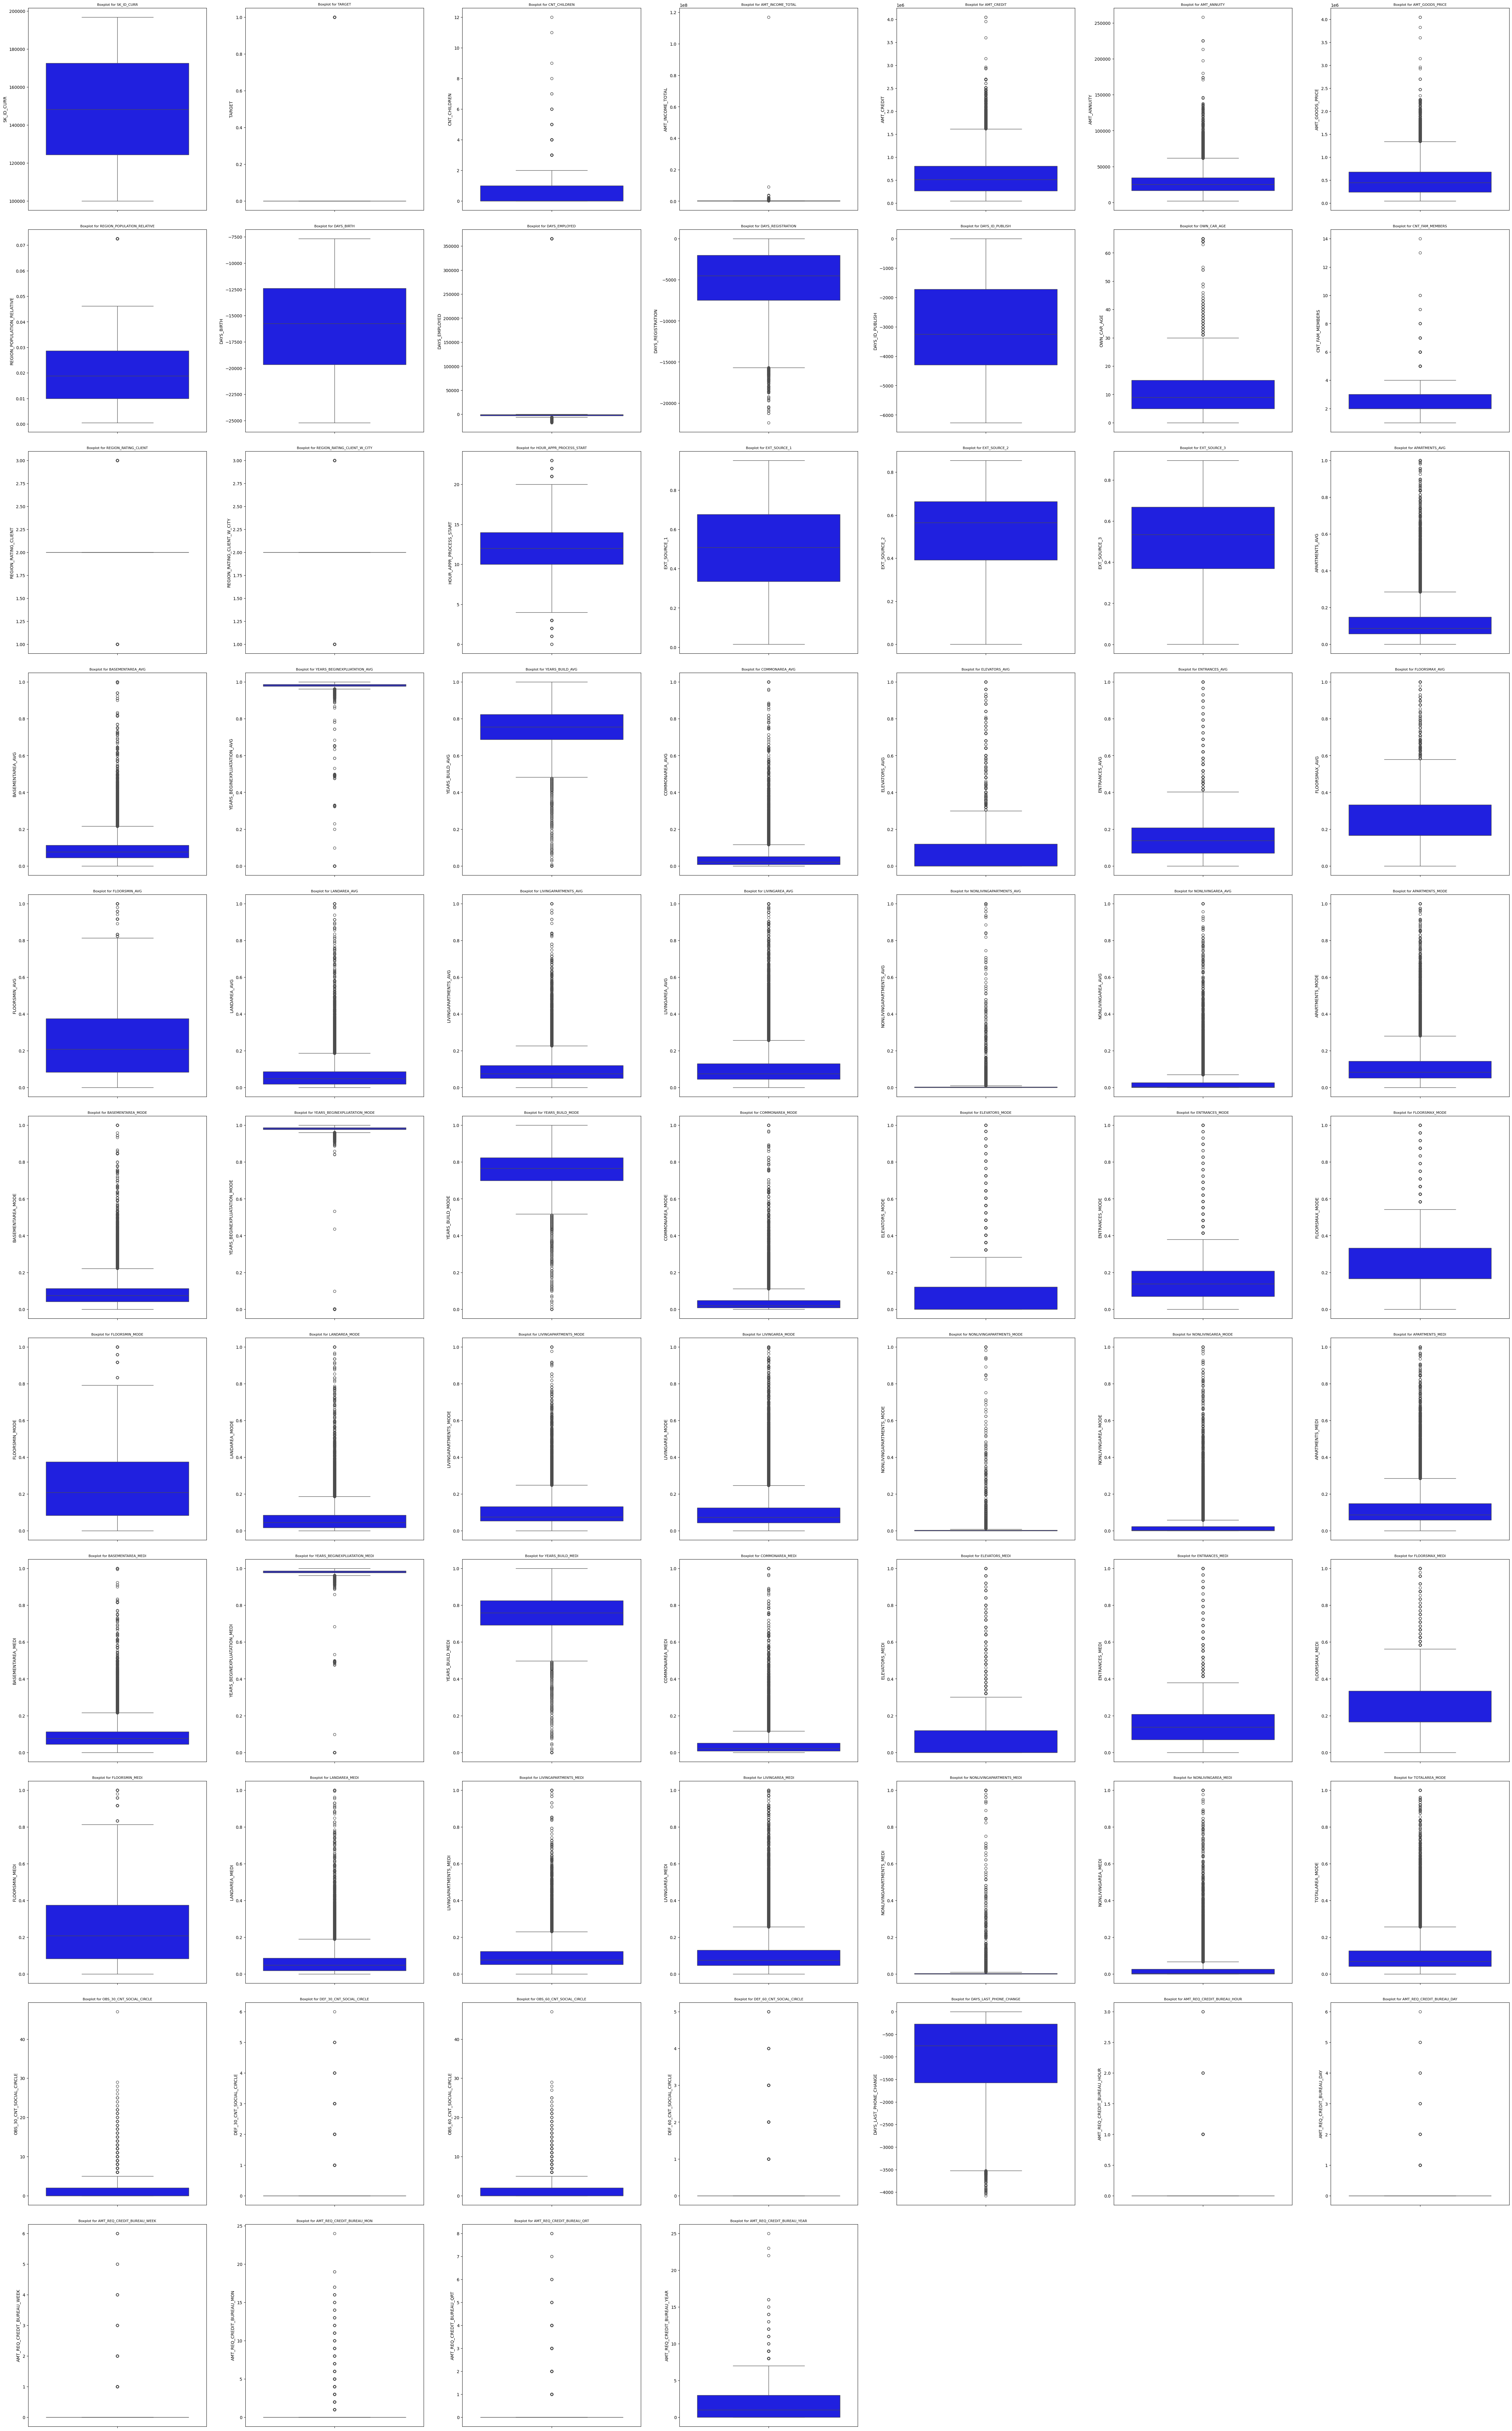

In [ ]:
plt.figure(figsize=(50,80))
columns_per_row = 7
num_rows = len(nums) // columns_per_row + (len(nums) % columns_per_row > 0)

for i, col in enumerate(nums, 1):
    plt.subplot(num_rows, columns_per_row, i)
    sns.boxplot(y=df[col], color='blue', orient='v')
    plt.title(f'Boxplot for {col}', fontsize=8)
    plt.tight_layout(pad=3.0)

In [ ]:
plt.figure(figsize=(70,100))

columns_per_row = 7
num_rows = len(nums) // columns_per_row + (len(nums) % columns_per_row > 0)

for i, col in enumerate(nums, 1):
    plt.subplot(num_rows, columns_per_row, i)
    sns.distplot(df[col])
    plt.title(f'Distplot for {col}')
    plt.tight_layout(pad=3.0)

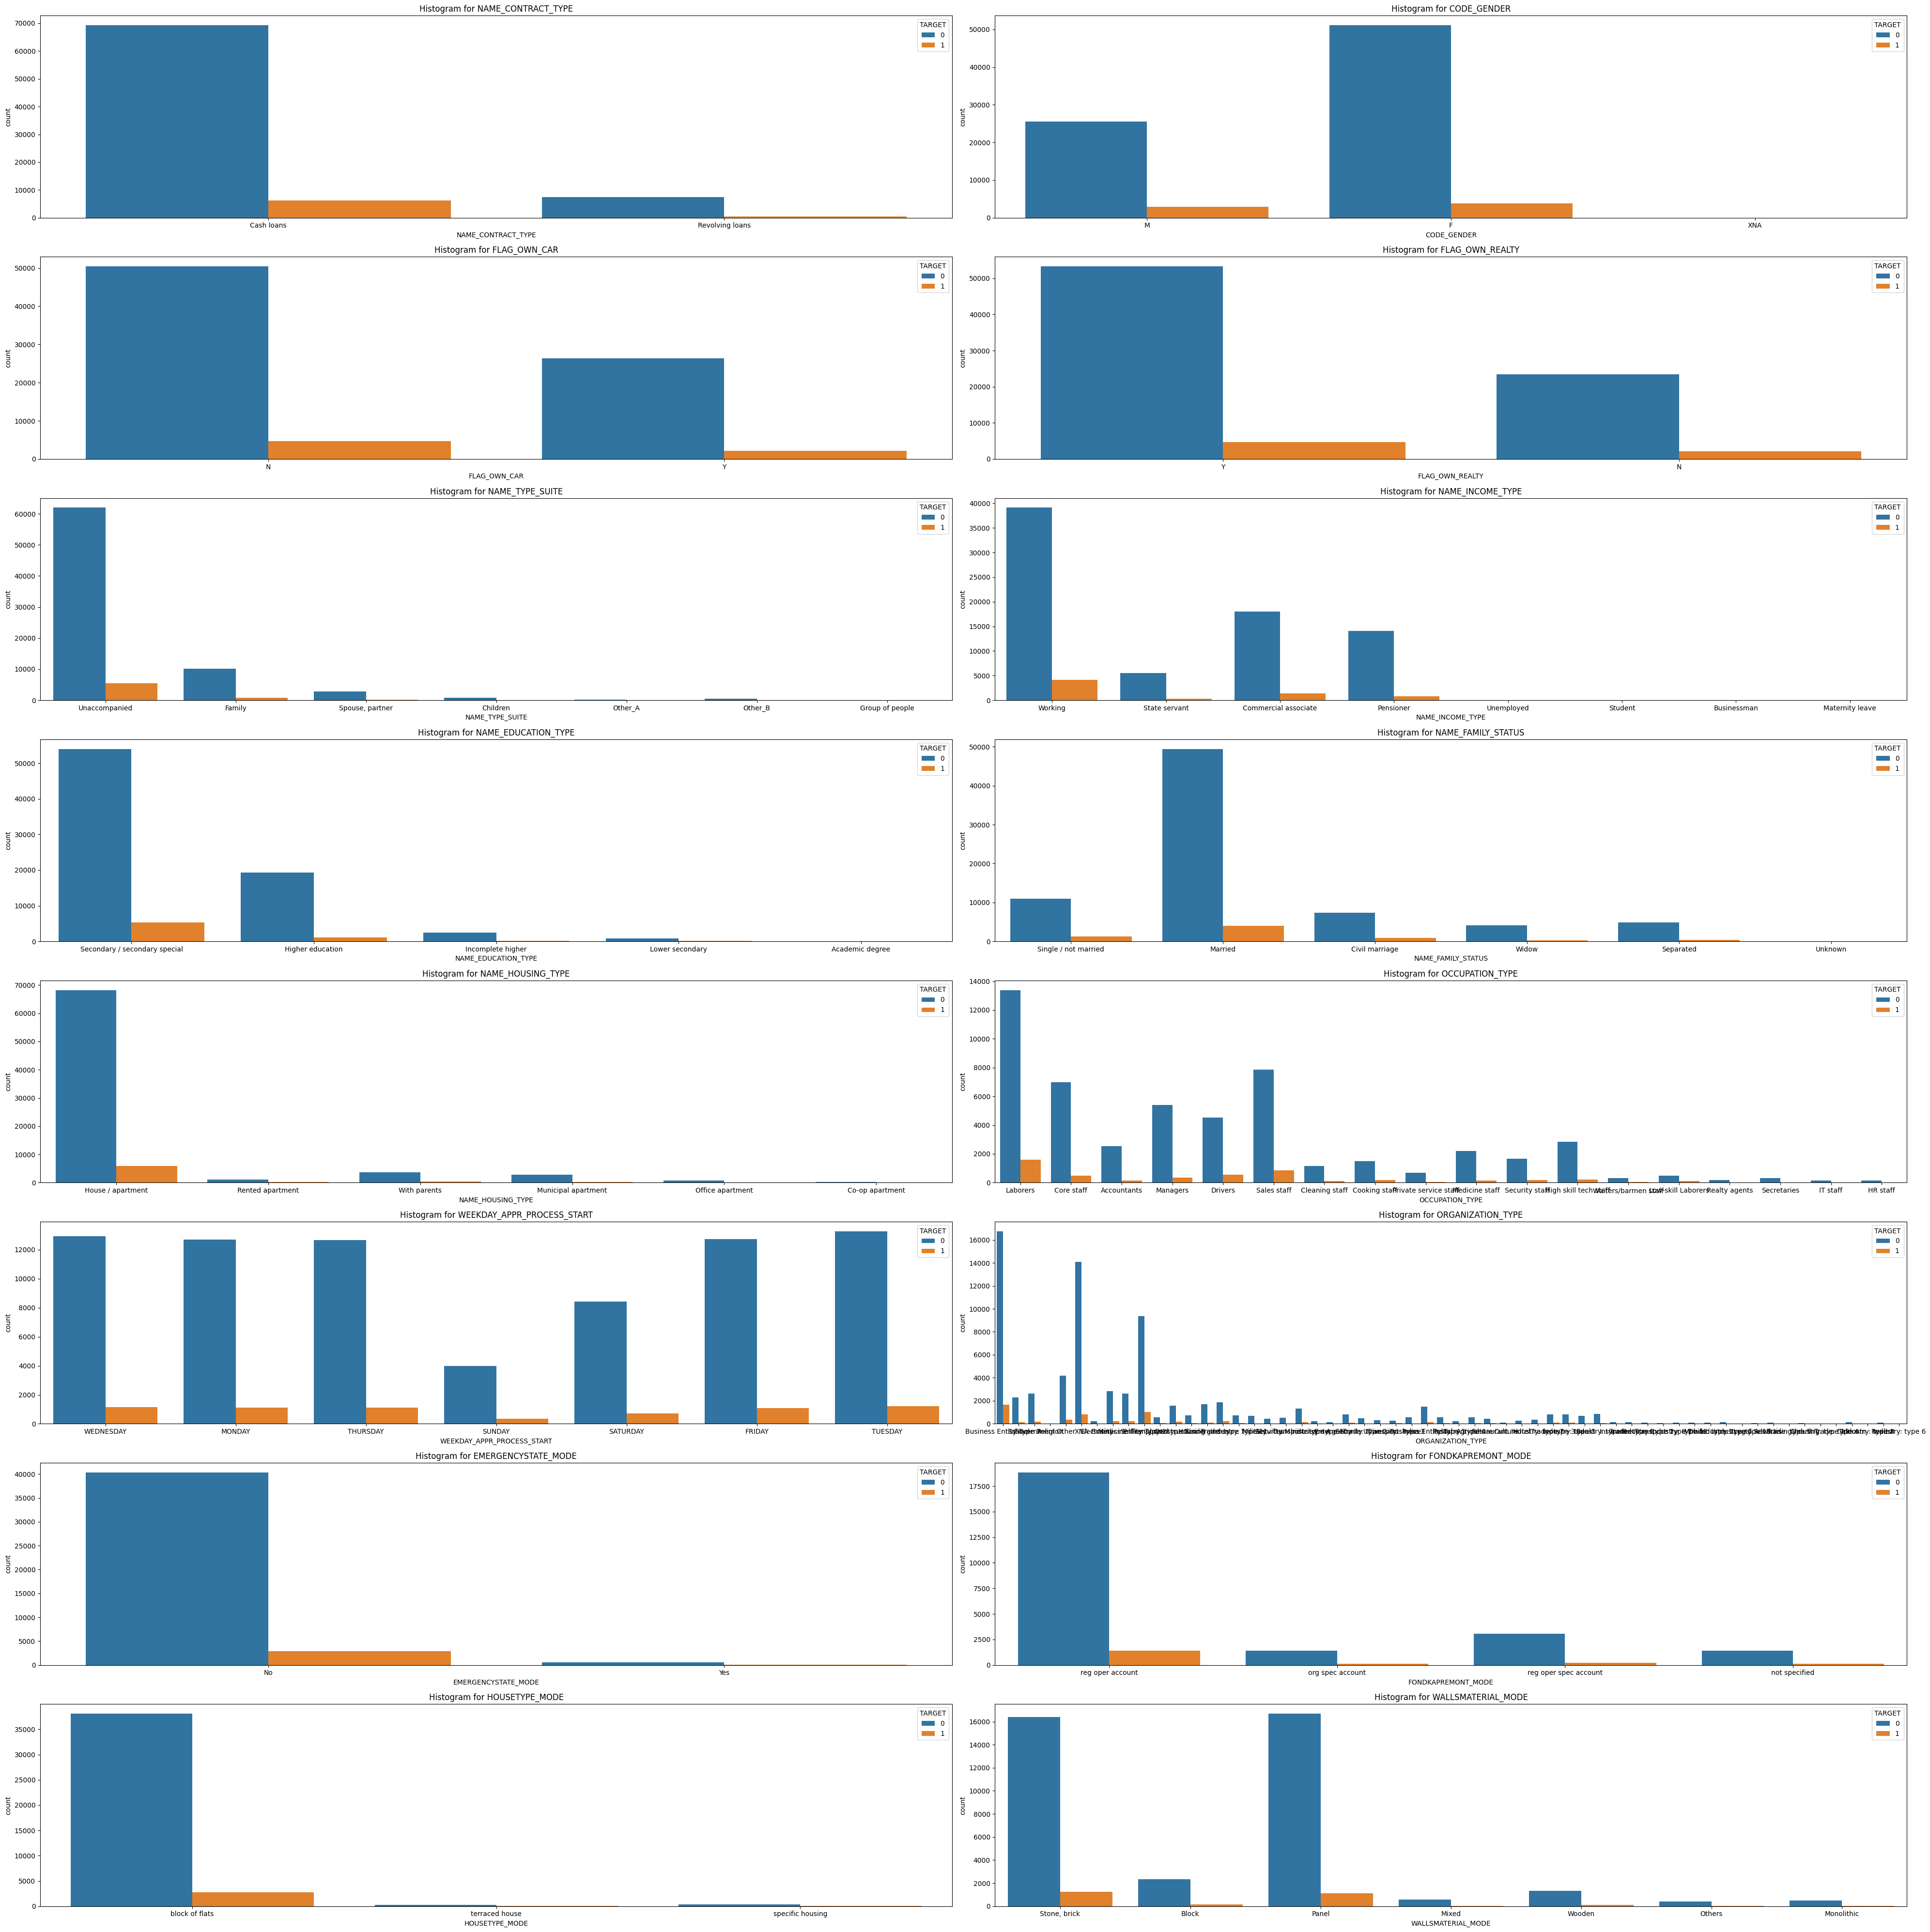

In [ ]:
plt.figure(figsize=(40, 40))  # Adjust the figure size as needed

for i, col in enumerate(cats, 1):
    plt.subplot(8, 2, i)
    sns.countplot(data=df, x=col, hue="TARGET")
    plt.title(f'Histogram for {col}')

plt.tight_layout()
plt.show()

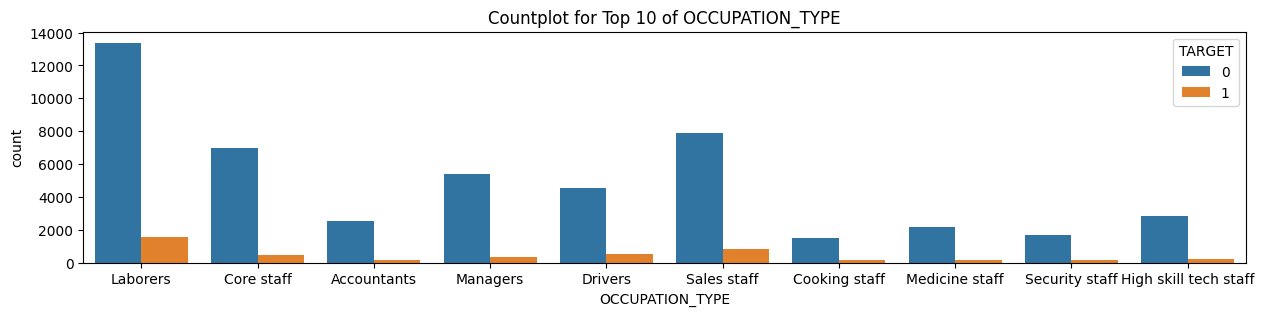

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom yang ingin dianalisis
column_to_analyze = 'OCCUPATION_TYPE'

# Hitung jumlah kemunculan setiap nilai dalam kolom
top_10_values = df[column_to_analyze].value_counts().nlargest(10).index

# Subset DataFrame dengan 10 nilai teratas
df_subset = df[df[column_to_analyze].isin(top_10_values)]

# Buat countplot untuk setiap nilai dalam subset
plt.figure(figsize=(15, 3))
sns.countplot(data=df_subset, x=column_to_analyze, hue="TARGET")
plt.title(f'Countplot for Top 10 of OCCUPATION_TYPE')
plt.show()


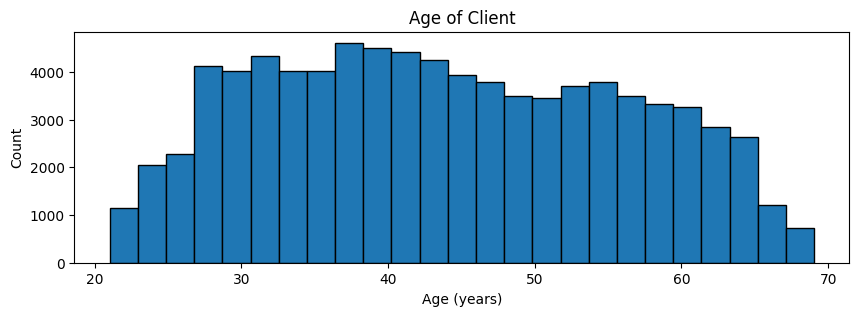

In [ ]:
# Distribusi umur client
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
# hisplot the distribution of ages in years
plt.figure (figsize=(10,3))
plt.hist(df['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

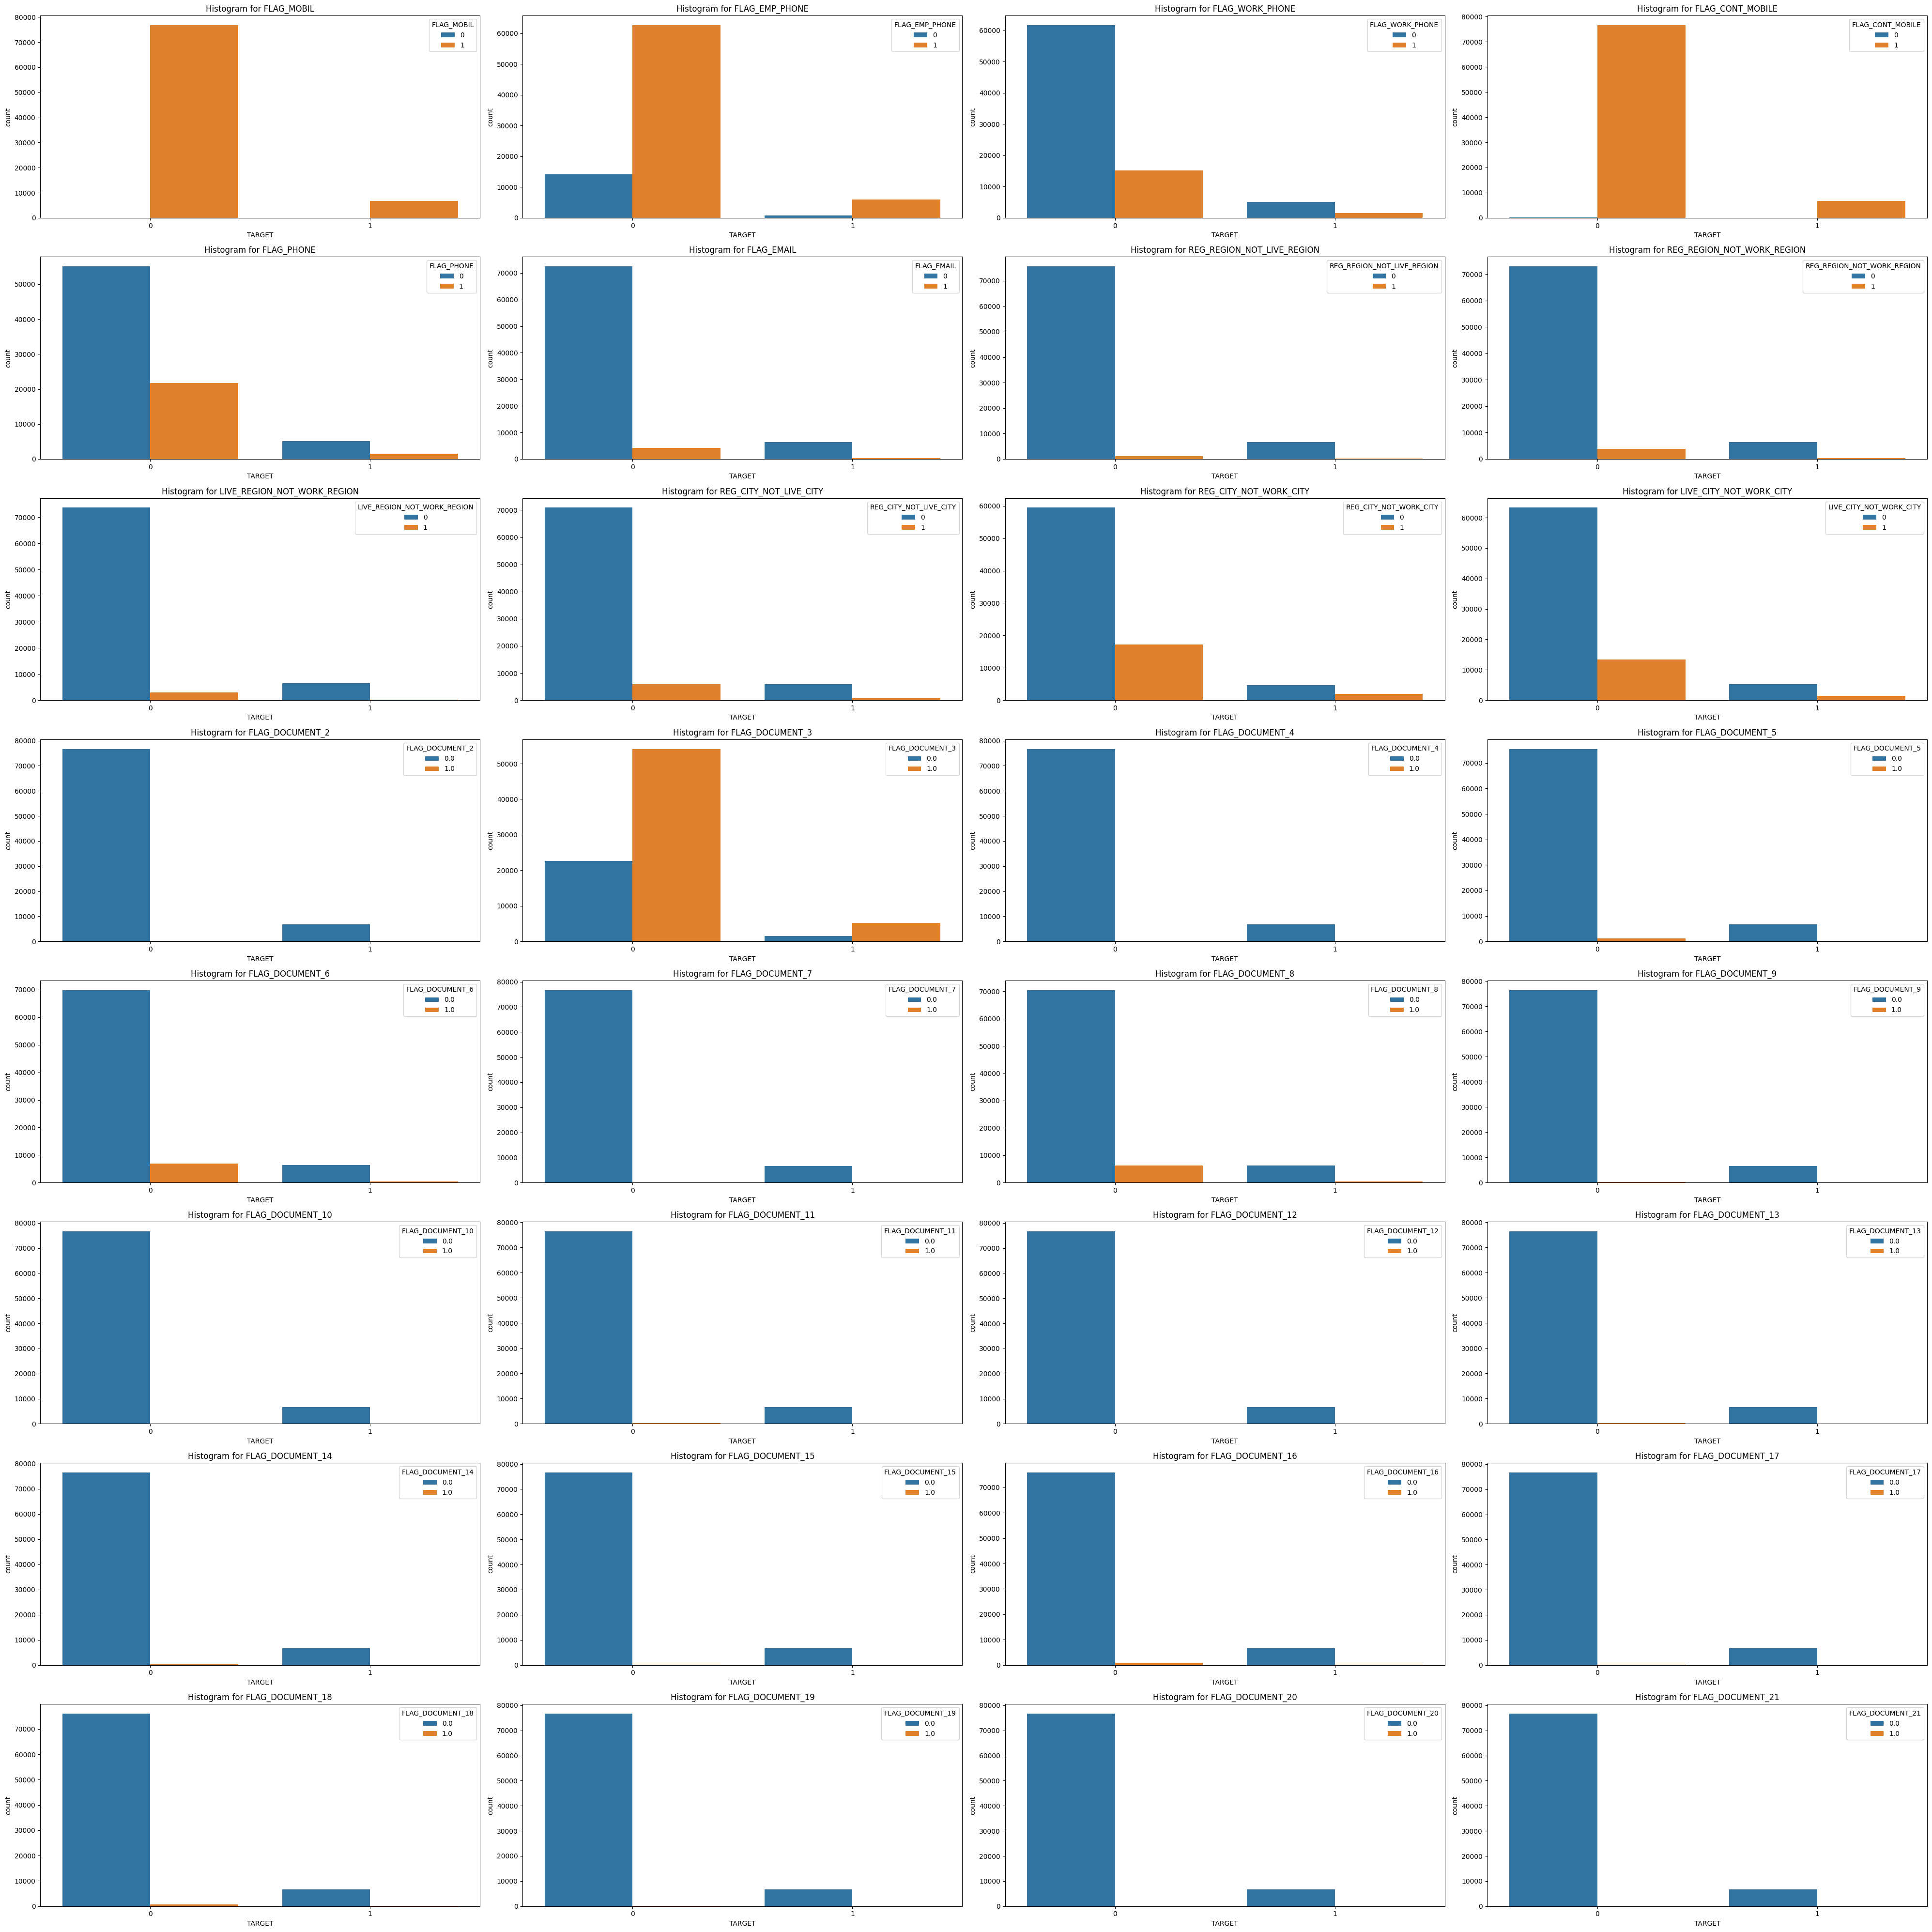

In [ ]:
plt.figure(figsize=(40, 40))  # Adjust the figure size as needed

for i, col in enumerate(binary, 1):
    plt.subplot(8, 4, i)  # Set 7 rows and 2 columns
    sns.countplot(data=df, x="TARGET", hue=col)
    plt.title(f'Histogram for {col}')

plt.tight_layout()
plt.show()

In [ ]:
df[binary].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FLAG_MOBIL                   83439 non-null  int64  
 1   FLAG_EMP_PHONE               83439 non-null  int64  
 2   FLAG_WORK_PHONE              83439 non-null  int64  
 3   FLAG_CONT_MOBILE             83439 non-null  int64  
 4   FLAG_PHONE                   83439 non-null  int64  
 5   FLAG_EMAIL                   83439 non-null  int64  
 6   REG_REGION_NOT_LIVE_REGION   83439 non-null  int64  
 7   REG_REGION_NOT_WORK_REGION   83439 non-null  int64  
 8   LIVE_REGION_NOT_WORK_REGION  83439 non-null  int64  
 9   REG_CITY_NOT_LIVE_CITY       83439 non-null  int64  
 10  REG_CITY_NOT_WORK_CITY       83439 non-null  int64  
 11  LIVE_CITY_NOT_WORK_CITY      83439 non-null  int64  
 12  FLAG_DOCUMENT_2              83438 non-null  float64
 13  FLAG_DOCUMENT_3 

In [ ]:
df.corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000  0.001554     -0.002057   
TARGET                        0.001554  1.000000      0.018741   
CNT_CHILDREN                 -0.002057  0.018741      1.000000   
AMT_INCOME_TOTAL             -0.003864  0.005829      0.009685   
AMT_CREDIT                   -0.004004 -0.031384      0.004421   
...                                ...       ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.004746  0.007742     -0.000290   
AMT_REQ_CREDIT_BUREAU_WEEK    0.001847  0.006164      0.000075   
AMT_REQ_CREDIT_BUREAU_MON    -0.001530 -0.011336     -0.011462   
AMT_REQ_CREDIT_BUREAU_QRT     0.006296 -0.002751     -0.012236   
AMT_REQ_CREDIT_BUREAU_YEAR    0.003614  0.018458     -0.040346   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.003864   -0.004004    -0.002392   
TARGET                              0.005829   -0.031384    -0.010694   
CNT_CHILDREN                        0.009685    0.004421     0.026738   
AMT_INCOME_TOTAL                    1.000000    0.089213     0.108191   
AMT_CREDIT                          0.089213    1.000000     0.772455   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.000854    0.004846     0.001239   
AMT_REQ_CREDIT_BUREAU_WEEK          0.000658   -0.001660     0.013541   
AMT_REQ_CREDIT_BUREAU_MON           0.014279    0.058640     0.040724   
AMT_REQ_CREDIT_BUREAU_QRT           0.001540    0.019275     0.013409   
AMT_REQ_CREDIT_BUREAU_YEAR          0.004218   -0.044916    -0.012359   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                        -0.004704                    0.003301   
TARGET                            -0.040546                   -0.040182   
CNT_CHILDREN                      -0.000015                   -0.022941   
AMT_INCOME_TOTAL                   0.090376                    0.041052   
AMT_CREDIT                         0.986932                    0.098244   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.005293                    0.000602   
AMT_REQ_CREDIT_BUREAU_WEEK        -0.000796                   -0.000034   
AMT_REQ_CREDIT_BUREAU_MON          0.060305                    0.079975   
AMT_REQ_CREDIT_BUREAU_QRT          0.019840                   -0.006617   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.048003                    0.008052   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  \
SK_ID_CURR                    0.002281       0.000055  ...          0.001867   
TARGET                       -0.077830      -0.041481  ...         -0.003973   
CNT_CHILDREN                 -0.330336      -0.238976  ...          0.001586   
AMT_INCOME_TOTAL             -0.017656      -0.037573  ...         -0.000123   
AMT_CREDIT                    0.057512      -0.068886  ...          0.026393   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.004363       0.002020  ...          0.008812   
AMT_REQ_CREDIT_BUREAU_WEEK    0.001822      -0.001012  ...         -0.007509   
AMT_REQ_CREDIT_BUREAU_MON    -0.000497      -0.031005  ...          0.002279   
AMT_REQ_CREDIT_BUREAU_QRT     0.013363       0.017460  ...         -0.001848   
AMT_REQ_CREDIT_BUREAU_YEAR    0.069752       0.046462  ...         -0.044814   

                            FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
SK_ID_CURR                         -0.002616         -0.006167   
TARGET                             -0.000469         -0.001761   
CNT_CHILDREN                       -0.002051          0.001938   
AMT_INCOME_TOTAL                    0.000520         -0.000534   
AMT_CREDIT                          0.023800          0.024545   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY         

In [ ]:
df['AGE'] = df['DAYS_BIRTH'] / 365
df['AGE'].head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: AGE, dtype: float64

<Axes: >

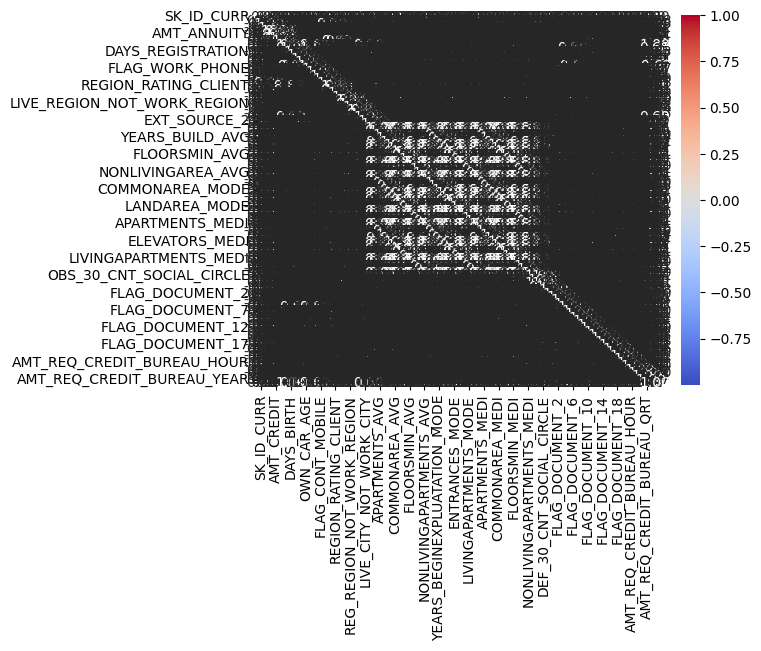

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidth=0.5)

In [ ]:
# sns.pairplot(df, hue='TARGET')

# Data Preprocessing

In [ ]:
# Missing Value pada Categorikal kolom
df[cats].isna().sum()

NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_TYPE_SUITE                 336
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE               26127
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
EMERGENCYSTATE_MODE           39557
FONDKAPREMONT_MODE            56933
HOUSETYPE_MODE                41859
WALLSMATERIAL_MODE            42430
dtype: int64

In [ ]:
missing_percentage = (df[cats].isna().sum() / len(df)) * 100
missing_percentage

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                0.402689
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.312696
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
EMERGENCYSTATE_MODE           47.408286
FONDKAPREMONT_MODE            68.233080
HOUSETYPE_MODE                50.167188
WALLSMATERIAL_MODE            50.851520
dtype: float64

In [ ]:
# handle missing values categorical columns with mode
for col in df[cats]:
    df[col].fillna(df[col].mode()[0], inplace=True)

df[cats].isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
EMERGENCYSTATE_MODE           0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
dtype: int64

In [ ]:
#Missing Value pada Numerical kolom
df[nums].isna().sum()

SK_ID_CURR                        0
TARGET                            0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     11161
AMT_REQ_CREDIT_BUREAU_WEEK    11161
AMT_REQ_CREDIT_BUREAU_MON     11161
AMT_REQ_CREDIT_BUREAU_QRT     11161
AMT_REQ_CREDIT_BUREAU_YEAR    11161
Length: 74, dtype: int64

In [ ]:
missing_percentage_nums = (df[nums].isna().sum() / len(df)) * 100
missing_percentage_nums

SK_ID_CURR                     0.000000
TARGET                         0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.376239
AMT_REQ_CREDIT_BUREAU_WEEK    13.376239
AMT_REQ_CREDIT_BUREAU_MON     13.376239
AMT_REQ_CREDIT_BUREAU_QRT     13.376239
AMT_REQ_CREDIT_BUREAU_YEAR    13.376239
Length: 74, dtype: float64

In [ ]:
# handle missing in numerical columns with mode

for col in df[nums]:
  df[col].fillna(df[col].mode()[0], inplace=True)

df[nums].isna().sum()

SK_ID_CURR                    0
TARGET                        0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 74, dtype: int64

In [ ]:
missing_percentage_binary = (df[nums].isna().sum() / len(df)) * 100
missing_percentage_binary

SK_ID_CURR                    0.0
TARGET                        0.0
CNT_CHILDREN                  0.0
AMT_INCOME_TOTAL              0.0
AMT_CREDIT                    0.0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 74, dtype: float64

In [ ]:
# handle missing in binary columns with mode

for col in df[binary]:
  df[col].fillna(df[col].mode()[0], inplace=True)

df[binary].isna().sum()

FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_19               0
FLAG_DOCUM

In [ ]:
df.duplicated().sum()

0

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

def handle_outliers(df, nums):
    for col in nums:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        low_limit = Q1 - (IQR * 1.5)
        high_limit = Q3 + (IQR * 1.5)

        filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit))
        df_prep = df[filtered_entries]

    return df_prep

df_prep = handle_outliers(df, nums)

print(f'Jumlah baris setelah memfilter outlier: {len(df_prep)}')

Jumlah baris sebelum memfilter outlier: 83439
Jumlah baris setelah memfilter outlier: 82500


In [ ]:
# scaling for numerical feature
from sklearn.preprocessing import MinMaxScaler, StandardScaler
for col in nums:
    df_prep[col] = MinMaxScaler().fit_transform(df_prep[col].values.reshape(len(df_prep), 1))


In [ ]:
columns_to_check = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
                    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                    'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE',
                    'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']

# Melihat nunique dari setiap kolom
for col in columns_to_check:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")


NAME_CONTRACT_TYPE: 2 unique values
CODE_GENDER: 3 unique values
FLAG_OWN_CAR: 2 unique values
FLAG_OWN_REALTY: 2 unique values
NAME_TYPE_SUITE: 7 unique values
NAME_INCOME_TYPE: 8 unique values
NAME_EDUCATION_TYPE: 5 unique values
NAME_FAMILY_STATUS: 6 unique values
NAME_HOUSING_TYPE: 6 unique values
OCCUPATION_TYPE: 18 unique values
WEEKDAY_APPR_PROCESS_START: 7 unique values
ORGANIZATION_TYPE: 58 unique values
EMERGENCYSTATE_MODE: 2 unique values
FONDKAPREMONT_MODE: 4 unique values
HOUSETYPE_MODE: 3 unique values
WALLSMATERIAL_MODE: 7 unique values


In [ ]:
#Label Encoding

mapping_NAME_CONTRACT_TYPE = {
    'Revolving loans':0,
    'Cash loans':1}
df['NAME_CONTRACT_TYPE'] = df['NAME_CONTRACT_TYPE'].map(mapping_NAME_CONTRACT_TYPE)

mapping_FLAG_OWN_CAR = {
    'N':0,
    'Y':1}
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map(mapping_FLAG_OWN_CAR)

mapping_FLAG_OWN_REALTY = {
    'N':0,
    'Y':1}
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map(mapping_FLAG_OWN_REALTY)

mapping_EMERGENCYSTATE_MODE = {
    'N':0,
    'Y':1}
df['EMERGENCYSTATE_MODE'] = df['EMERGENCYSTATE_MODE'].map(mapping_EMERGENCYSTATE_MODE)


In [ ]:
# List of categorical columns to one-hot encode
columns_to_encode = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                     'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
                     'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
                     'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']

df_encod0 = pd.get_dummies(df['CODE_GENDER'],prefix='gender')
df_encod1 = pd.get_dummies(df['NAME_TYPE_SUITE'],prefix='type_suite')
df_encod2 = pd.get_dummies(df['NAME_INCOME_TYPE'],prefix='income_type')
df_encod3 = pd.get_dummies(df['NAME_EDUCATION_TYPE'],prefix='education_type')
df_encod4 = pd.get_dummies(df['NAME_FAMILY_STATUS'],prefix='family_status')
df_encod5 = pd.get_dummies(df['NAME_HOUSING_TYPE'],prefix='housing_type')
df_encod6 = pd.get_dummies(df['OCCUPATION_TYPE'],prefix='occupation_type')
df_encod7 = pd.get_dummies(df['WEEKDAY_APPR_PROCESS_START'],prefix='weekday_appr_process_start')
df_encod8 = pd.get_dummies(df['ORGANIZATION_TYPE'],prefix='organization_type')
df_encod9 = pd.get_dummies(df['FONDKAPREMONT_MODE'],prefix='fondkapremont_mode')
df_encod10 = pd.get_dummies(df['HOUSETYPE_MODE'],prefix='housetype_mode')
df_encod11 = pd.get_dummies(df['WALLSMATERIAL_MODE'],prefix='wallsmaterial_mode')


# List of one-hot encoded DataFrames
dfs_to_concat = [df_encod0, df_encod1, df_encod2, df_encod3, df_encod4, df_encod5,
                 df_encod6, df_encod7, df_encod8, df_encod9, df_encod10, df_encod11]

# Concatenate the one-hot encoded DataFrames with the original DataFrame
df_final = pd.concat([df] + dfs_to_concat, axis=1)

# Drop the original categorical columns since they are now one-hot encoded
df_prep = df_final.drop(columns=['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                                  'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
                                  'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
                                  'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE'])


In [ ]:
fitur = df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
            'AMT_ANNUITY', 'DAYS_ID_PUBLISH', 'CODE_GENDER', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE','AGE']]
df_fix = fitur

In [ ]:
df_fix.head()

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  \
0       1      0.083037      0.262949      0.139376        9461   
1       0      0.311267      0.622246      0.746300       16765   
2       0      0.690801      0.555912      0.729567       19046   
3       0      0.690801      0.650442      0.746300       19005   
4       0      0.690801      0.322738      0.746300       19932   

   DAYS_EMPLOYED NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  AMT_ANNUITY  \
0           -637          Working  Secondary / secondary special      24700.5   
1          -1188    State servant               Higher education      35698.5   
2           -225          Working  Secondary / secondary special       6750.0   
3          -3039          Working  Secondary / secondary special      29686.5   
4          -3038          Working  Secondary / secondary special      21865.5   

   DAYS_ID_PUBLISH CODE_GENDER  AMT_CREDIT  AMT_GOODS_PRICE  \
0            -2120           M    406597.5         351000.0   
1             -291           F   1293502.5        1129500.0   
2            -2531           M    135000.0         135000.0   
3            -2437           F    312682.5         297000.0   
4            -3458           M    513000.0         513000.0   

   DAYS_REGISTRATION       ORGANIZATION_TYPE  DAYS_LAST_PHONE_CHANGE  \
0            -3648.0  Business Entity Type 3                 -1134.0   
1            -1186.0                  School                  -828.0   
2            -4260.0              Government                  -815.0   
3            -9833.0  Business Entity Type 3                  -617.0   
4            -4311.0                Religion                 -1106.0   

         AGE  
0  25.920548  
1  45.931507  
2  52.180822  
3  52.068493  
4  54.608219

<Axes: >

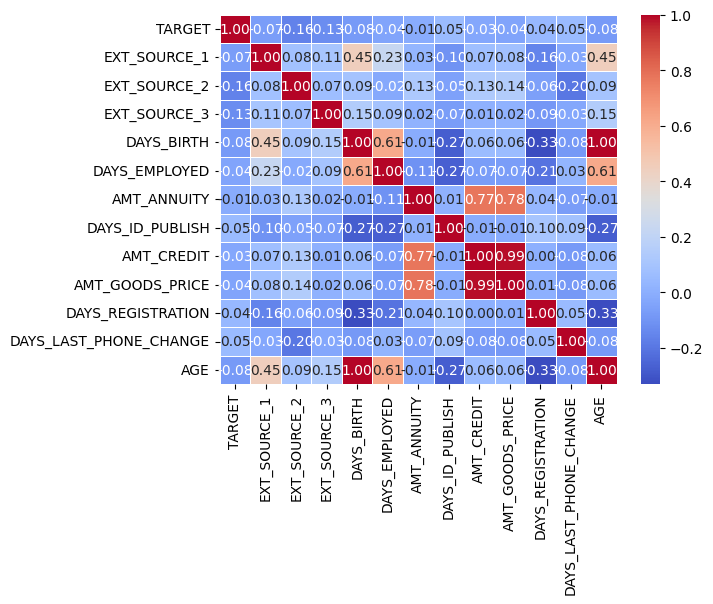

In [ ]:
sns.heatmap(df_fix.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidth=0.5)

In [ ]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TARGET                  83439 non-null  int64  
 1   EXT_SOURCE_1            83439 non-null  float64
 2   EXT_SOURCE_2            83439 non-null  float64
 3   EXT_SOURCE_3            83439 non-null  float64
 4   DAYS_BIRTH              83439 non-null  int64  
 5   DAYS_EMPLOYED           83439 non-null  int64  
 6   NAME_INCOME_TYPE        83439 non-null  object 
 7   NAME_EDUCATION_TYPE     83439 non-null  object 
 8   AMT_ANNUITY             83439 non-null  float64
 9   DAYS_ID_PUBLISH         83439 non-null  int64  
 10  CODE_GENDER             83439 non-null  object 
 11  AMT_CREDIT              83439 non-null  float64
 12  AMT_GOODS_PRICE         83439 non-null  float64
 13  DAYS_REGISTRATION       83439 non-null  float64
 14  ORGANIZATION_TYPE       83439 non-null

In [ ]:
# List of categorical columns to one-hot encode
columns_to_encode = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'CODE_GENDER', 'ORGANIZATION_TYPE']

encod1 = pd.get_dummies(df_fix['NAME_INCOME_TYPE'],prefix='income_type')
encod2 = pd.get_dummies(df_fix['NAME_EDUCATION_TYPE'],prefix='education_type')
encod3 = pd.get_dummies(df_fix['CODE_GENDER'],prefix='gender')
encod4 = pd.get_dummies(df_fix['ORGANIZATION_TYPE'],prefix='organization_type')


# List of one-hot encoded DataFrames
dfs_to_concat = [encod1,encod2,encod3,encod4]

# Concatenate the one-hot encoded DataFrames with the original DataFrame
df_final = pd.concat([df_fix] + dfs_to_concat, axis=1)

# Drop the original categorical columns since they are now one-hot encoded
df_prep = df_final.drop(columns=['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','CODE_GENDER','ORGANIZATION_TYPE'])


In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 87 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   TARGET                                        83439 non-null  int64  
 1   EXT_SOURCE_1                                  83439 non-null  float64
 2   EXT_SOURCE_2                                  83439 non-null  float64
 3   EXT_SOURCE_3                                  83439 non-null  float64
 4   DAYS_BIRTH                                    83439 non-null  int64  
 5   DAYS_EMPLOYED                                 83439 non-null  int64  
 6   AMT_ANNUITY                                   83439 non-null  float64
 7   DAYS_ID_PUBLISH                               83439 non-null  int64  
 8   AMT_CREDIT                                    83439 non-null  float64
 9   AMT_GOODS_PRICE                               83439 non-null 

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df_prep.drop(['TARGET'], axis=1)
y = df_prep['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(f'Number of Train Data: {X_train.shape[0]}')
print(f'Number of Test Data: {X_test.shape[0]}')

Number of Train Data: 66751
Number of Test Data: 16688


In [ ]:
# OVERSAMPLING
from imblearn import over_sampling
X_oversampling , y_oversampling = over_sampling.SMOTE(random_state=42).fit_resample(X_train,y_train)
print(pd.Series(y_oversampling).value_counts())

0    61382
1    61382
Name: TARGET, dtype: int64


#Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train

LogisticRegression()

In [ ]:
# Inisialisasi model
logreg_model = LogisticRegression(max_iter=1000)  # Menambahkan max_iter untuk mengatasi konvergensi
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
adaboost_model = AdaBoostClassifier()

# Model Dictionary
models = {
    'Logistic Regression': logreg_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
}

In [ ]:
# Evaluasi setiap model
for model_name, model in models.items():
    # Training model
    model.fit(X_train, y_train)

    # Prediksi pada data test
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # AUC Score untuk data test (jika model mendukung predict_proba)
    if hasattr(model, 'predict_proba'):
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]
        auc_test = roc_auc_score(y_test, y_pred_proba_test)
    else:
        auc_test = None

    # AUC Score untuk data train (jika model mendukung predict_proba)
    if hasattr(model, 'predict_proba'):
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_pred_proba_train)
    else:
        auc_train = None

    # Evaluasi metrik pada data test
    accuracy_test = accuracy_score(y_test, y_pred_test)
    classification_report_test = classification_report(y_test, y_pred_test)

    # Evaluasi metrik pada data train
    accuracy_train = accuracy_score(y_train, y_pred_train)
    classification_report_train = classification_report(y_train, y_pred_train)

    # Menampilkan hasil evaluasi
    print(f'{model_name} Evaluation:\n{"-"*50}\n')
    print(f'Train Accuracy: {accuracy_train:.2f}\nTrain Classification Report:\n{classification_report_train}\n')
    print(f'Test Accuracy: {accuracy_test:.2f}\nTest Classification Report:\n{classification_report_test}\n')
    if auc_train is not None:
        print(f'Train AUC Score: {auc_train:.2f}\nTest AUC Score: {auc_test:.2f}\n{"="*70}\n')
    else:
        print('Model does not support predict_proba.\n{"="*70}\n')

Logistic Regression Evaluation:
--------------------------------------------------

Train Accuracy: 0.92
Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     61382
           1       0.00      0.00      0.00      5369

    accuracy                           0.92     66751
   macro avg       0.46      0.50      0.48     66751
weighted avg       0.85      0.92      0.88     66751


Test Accuracy: 0.92
Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15337
           1       0.00      0.00      0.00      1351

    accuracy                           0.92     16688
   macro avg       0.46      0.50      0.48     16688
weighted avg       0.84      0.92      0.88     16688


Train AUC Score: 0.62
Test AUC Score: 0.63

Decision Tree Evaluation:
--------------------------------------------------

Train Accuracy: 1.00
Train Classificatio

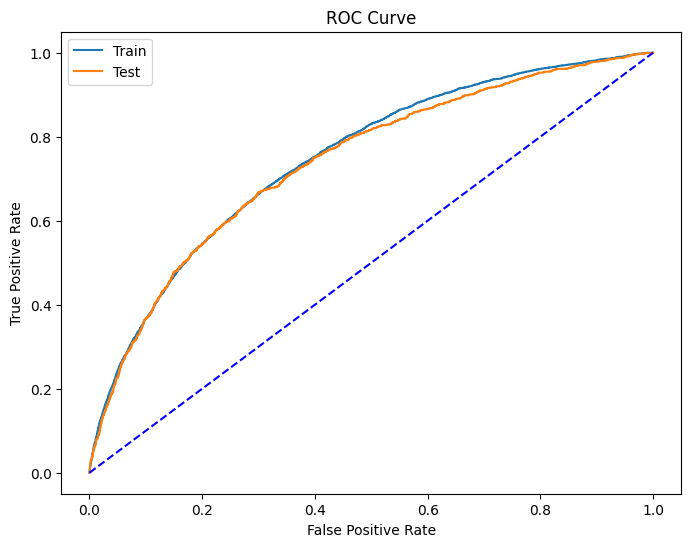

In [ ]:
from sklearn.metrics import roc_curve

# Predict the probability score
prob_train = model.predict_proba(X_train)[:, 1]
prob_test = model.predict_proba(X_test)[:, 1]

# Create train and test curve
fpr_train, tpr_train, thresh_train = roc_curve(y_train, prob_train)
fpr_test, tpr_test, thresh_test = roc_curve(y_test, prob_test)

# Create the straight line (how the graph looks like if the model does random guess instead)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

# Plot the model
plt.figure(figsize=(8, 6))
plt.title('ROC Curve')
plt.plot(fpr_train, tpr_train, label='Train')
plt.plot(fpr_test, tpr_test, label='Test')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')  # Dotted line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [ ]:
# Predict the probability score
prob_train = model.predict_proba(X_train)[:, 1]
prob_test = model.predict_proba(X_test)[:, 1]

# Calculating the train and test AUC score
auc_score_train = roc_auc_score(y_train, prob_train)
auc_score_test = roc_auc_score(y_test, prob_test)

print('auc_score_train =', auc_score_train)
print('auc_score_test =', auc_score_test)

auc_score_train = 0.7477143370069248
auc_score_test = 0.7391359492269581


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter Tuning untuk XGBoost
param_grid_xgb = {'n_estimators': [50, 100, 200], 'max_depth': [3, 6, 9]}
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(), param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)

best_params_xgb = grid_search_xgb.best_params_

print(f'Best Hyperparameters for XGBoost: {best_params_xgb}')

# Melatih model XGBoost dengan hyperparameter terbaik
best_model_xgb = grid_search_xgb.best_estimator_
best_model_xgb.fit(X_train, y_train)

# Convert true labels to numeric
y_test_numeric = y_test.replace({'no': 0, 'yes': 1})

# Evaluasi model XGBoost setelah hyperparameter tuning pada data test
y_pred_test_tuned_xgb = best_model_xgb.predict(X_test)

# Menampilkan hasil evaluasi model XGBoost setelah hyperparameter tuning pada data test
print(f'XGBoost Evaluation on Test Data after Hyperparameter Tuning:\n')
print(f'Accuracy: {accuracy_score(y_test_numeric, y_pred_test_tuned_xgb):.2f}')
print(f'Classification Report:\n{classification_report(y_test_numeric, y_pred_test_tuned_xgb)}')

Best Hyperparameters for XGBoost: {'max_depth': 3, 'n_estimators': 50}
XGBoost Evaluation on Test Data after Hyperparameter Tuning:

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15337
           1       0.51      0.02      0.03      1351

    accuracy                           0.92     16688
   macro avg       0.72      0.51      0.50     16688
weighted avg       0.89      0.92      0.88     16688



In [ ]:
# Menghitung Approval Rate

accuracy = accuracy_score(y_test, y_pred_test)
approval_rate = accuracy * 100  # Mengonversi ke persentase

print(f"Approval Rate: {approval_rate:.2f}%")

Approval Rate: 91.92%


In [ ]:
# AUC Score untuk data test setelah hyperparameter tuning
y_pred_proba_test_tuned_xgb = best_model_xgb.predict_proba(X_test)[:, 1]
auc_test_tuned_xgb = roc_auc_score(y_test, y_pred_proba_test_tuned_xgb)

# AUC Score untuk data train setelah hyperparameter tuning
y_pred_proba_train_tuned_xgb = best_model_xgb.predict_proba(X_train)[:, 1]
auc_train_tuned_xgb = roc_auc_score(y_train, y_pred_proba_train_tuned_xgb)

# Menampilkan hasil evaluasi AUC Score
print(f'AUC Score for XGBoost on Test Data after Hyperparameter Tuning: {auc_test_tuned_xgb:.2f}')
print(f'AUC Score for XGBoost on Train Data after Hyperparameter Tuning: {auc_train_tuned_xgb:.2f}\n')

AUC Score for XGBoost on Test Data after Hyperparameter Tuning: 0.74
AUC Score for XGBoost on Train Data after Hyperparameter Tuning: 0.77



Feature Importance (XGBoost):
                               Feature  Importance
25                            gender_F    0.152326
1                         EXT_SOURCE_2    0.112995
15               income_type_Pensioner    0.096000
2                         EXT_SOURCE_3    0.081267
26                            gender_M    0.070165
..                                 ...         ...
50  organization_type_Industry: type 5    0.000000
51  organization_type_Industry: type 6    0.000000
52  organization_type_Industry: type 7    0.000000
53  organization_type_Industry: type 8    0.000000
85               organization_type_XNA    0.000000

[86 rows x 2 columns]


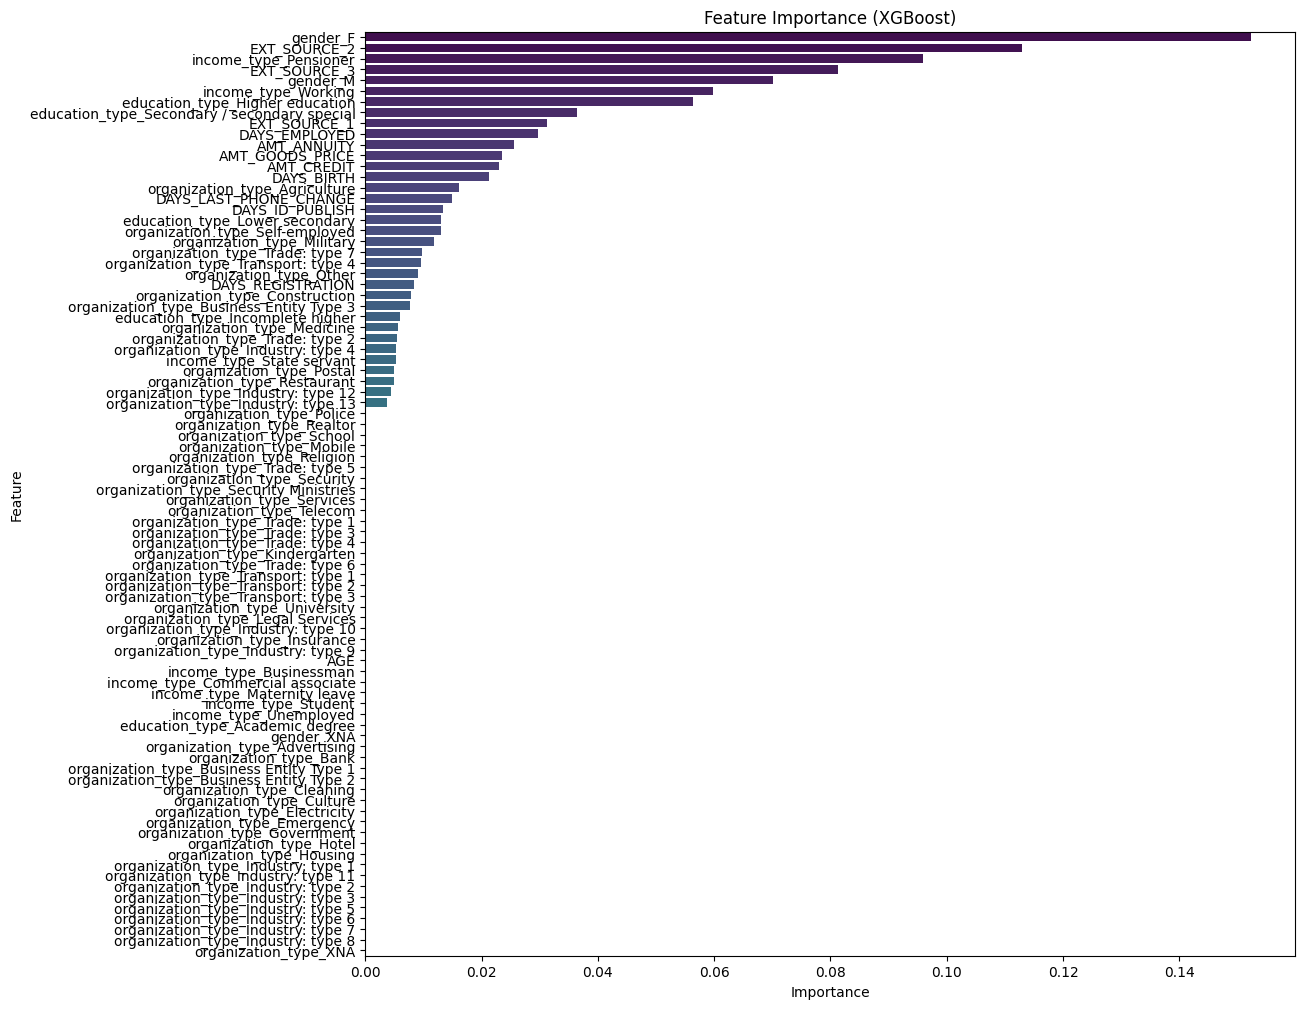

In [ ]:
# Mendapatkan feature importance dari model XGBoost terbaik
feature_importance_xgb = best_model_xgb.feature_importances_

# Membuat DataFrame untuk lebih mudah diproses
feature_importance_df_xgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_xgb})

# Mengurutkan DataFrame berdasarkan importance secara descending
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

# Menampilkan feature importance
print("Feature Importance (XGBoost):")
print(feature_importance_df_xgb)

plt.figure(figsize=(12,12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_xgb, orient='h', palette='viridis')
plt.title('Feature Importance (XGBoost)')
plt.savefig('fi.png')
plt.show()

Top 26 Feature Importance (XGBoost):
                                         Feature  Importance
25                                      gender_F    0.152326
1                                   EXT_SOURCE_2    0.112995
15                         income_type_Pensioner    0.096000
2                                   EXT_SOURCE_3    0.081267
26                                      gender_M    0.070165
19                           income_type_Working    0.059876
21               education_type_Higher education    0.056362
24  education_type_Secondary / secondary special    0.036355
0                                   EXT_SOURCE_1    0.031197
4                                  DAYS_EMPLOYED    0.029704
5                                    AMT_ANNUITY    0.025624
8                                AMT_GOODS_PRICE    0.023547
7                                     AMT_CREDIT    0.023037
3                                     DAYS_BIRTH    0.021275
29                 organization_type_Agriculture

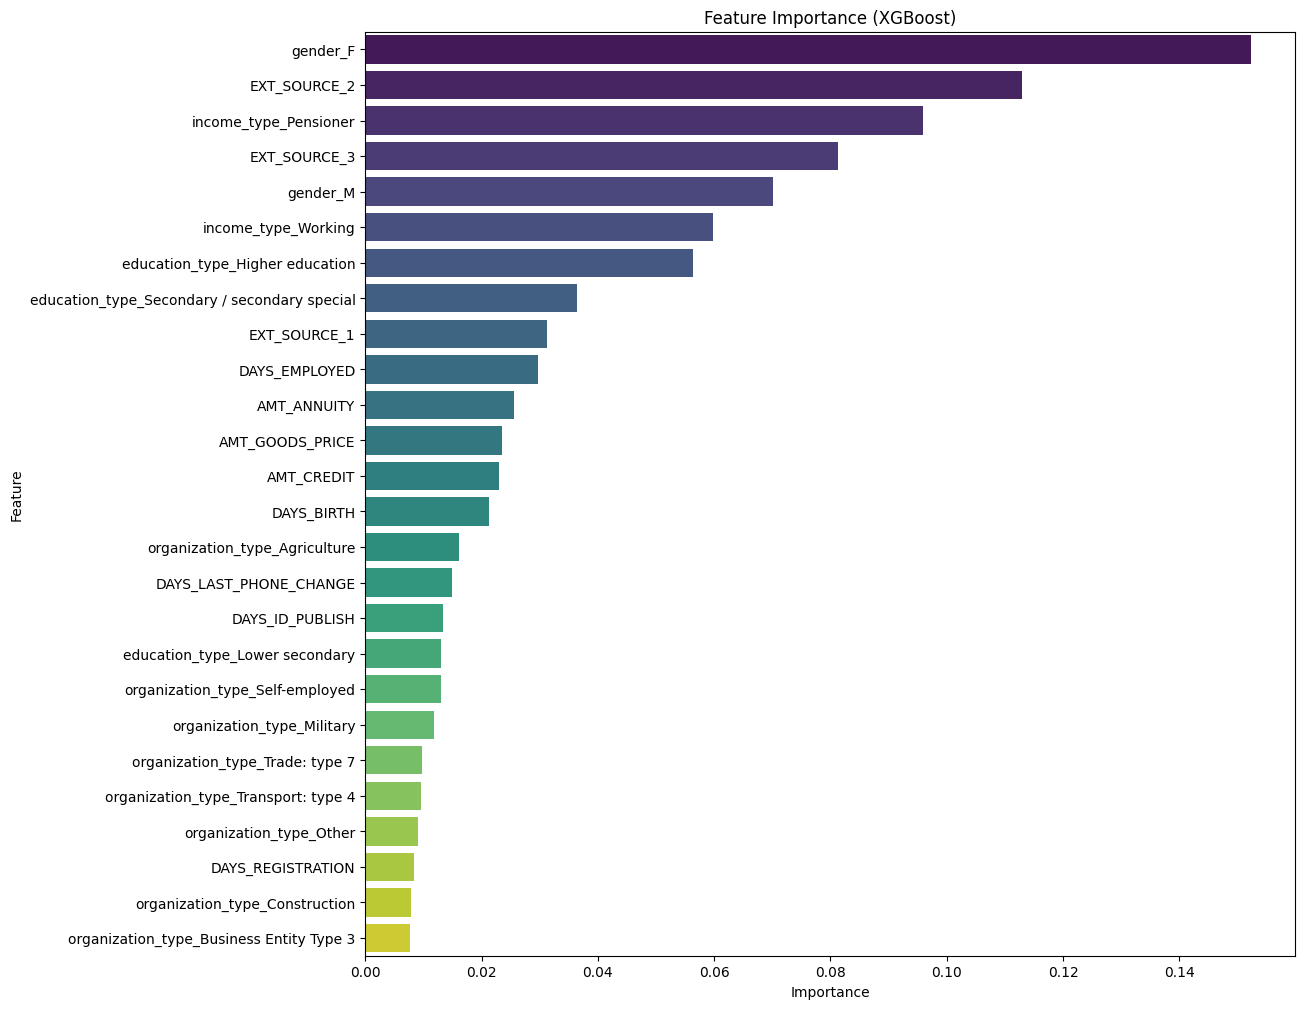

In [ ]:
# Mengurutkan DataFrame berdasarkan importance secara descending
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

# Mengambil 26 fitur teratas
top_26_features = feature_importance_df_xgb.head(26)

# Menampilkan feature importance
print("Top 26 Feature Importance (XGBoost):")
print(top_26_features)

# Membuat bar plot hanya untuk 26 fitur teratas
plt.figure(figsize=(12, 12))
sns.barplot(x='Importance', y='Feature', data=top_26_features, orient='h', palette='viridis')
plt.title('Feature Importance (XGBoost)')
plt.savefig('top_26_fi.png')
plt.show()
